# Recherche Textuelle

### Partie A <a class="anchor" id="chapter1"></a>

Introduction :

Rechercher une chaîne de caractères dans une autre est un problème récurrent, que ce soit en informatique ou dans d'autres sciences comme par exemple en génétique, dès lors qu'il s'agit de localiser un motif dans une séquence d'ADN.

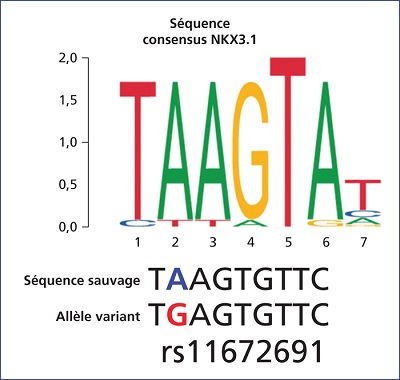

Faire une petite recherche sur les Web Crawlers, donner quelques exemples et expliquer leur mode de fonctionnement. En quoi notre chapitre s'en rapproche-t-il ?

<p>Dans ce chapitre, on va s'intéresser au problème au problème de la recherche des occurences d'une chaîne de caractères, que l'on appelera <em>motif</em> dans une autre chaîne de caractères, que l'on appellera <em>texte</em>.</p><p>Par exemple, il y a deux occurences du motif <strong>"bra"</strong> dans le texte <strong>"abracadabra"</strong>. Plus précisément, on va chercher à quelles positions dans le texte le motif apparaît.

## I. Rappels sur les chaînes de caractère

<p>Une chaîne de caractères peut être écrite au choix entre apostrophes ou entre guillements. Ainsi, on peut écrire indifféremment <strong>'abracadabra'</strong> ou <strong>"abracadabra"</strong>.</p>
<p>La longueur d'une chaîne <code>s</code> est obtenue avec <code>len(s)</code>. Les caractères sont évidemment numérotées à partir de 0. Le (i+1)-ième caractère est obtenu avec <code>s[i]</code>. </p>
<p>La sous-chaîne de <code>s</code> contenant les caractères <code>i</code> inclus à <code>j</code> exclu est obtenu avec <code>s[i:j]</code>. Il s'agit d'une nouvelle chaîne de caractère, la chaine <code>s</code> n'étant pas modifiée. Les caractères et les chaînes peuvent être comparées avec l'opérateur <code>==</code>.

###Application au chapitre

<p>On note <code>m</code> de longueur $p$ le motif que l'on cherche et <code>t</code> de longueur $n$ le texte dans lequel on le recherche.</p>
<p>Une première remarque évidente est qu'il ne peut y avoir une occurence de <code>m</code> dans <code>t</code> que si $p \leq n$.</p>
<p>Plus précisément, une occurence de <code>m</code> dans <code>t</code> à la position $i$ est contrainte par l'inégalité $0 \leq i \leq n-p$.</p>
<p> Il peut être utile de se représenter une occurence de <code>m</code> dans <code>t</code> à la position $i$ comme ceci : </p>

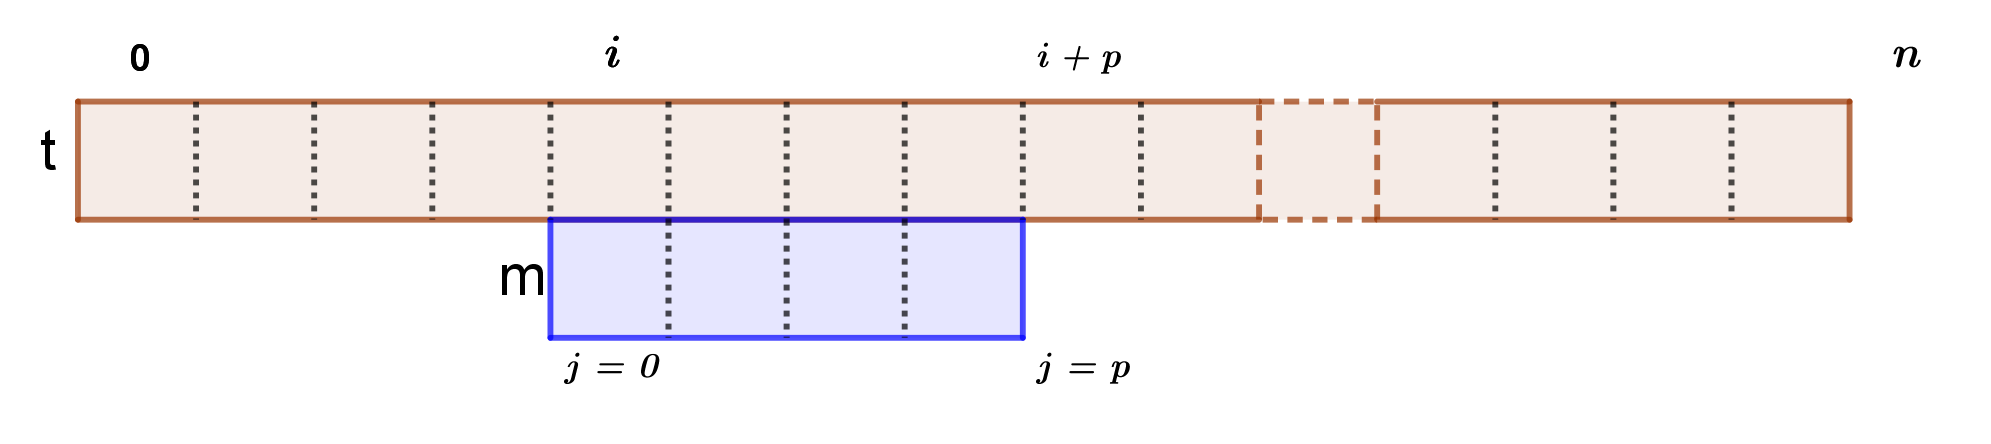

<p>Au dessus, on a représenté les indices des carctères du texte, qui vont de 0 inclus à $n$ exclu. En dessous, on a représenté les indices des caractères du motif, qui vont de 0 inclus à $p$ exclu.</p>
<p>S'il y a une occurence à la position $i$, alors les caractères t[$i$],...,t[$i+p-1$] du texte coïncident avec les caractères m[$0$],...,m[$p-1$] du motif.

<ul>
    <li>Nous notons donc $i$ la position de la fenêtre dans <strong>t</strong> : c’est l’index du premier caractère du texte qui apparaît dans la fenêtre.
<li>Nous notons $j$ l’index dans <strong>m</strong> du caractère du motif que nous comparons avec son analogue du texte : on compare m[$j$] avec t[$i+j$].
<li>La recherche peut se faire à condition que $i+p \leq n$ puisque les caractères du texte qui apparaissent dans la fenêtre ont pour index $i, i + 1, …, i + p − 1$.
    </ul>

## II. La méthode <code>find</code> de Python

<p>Le site <a href="http://www.gutenberg.org/browse/languages/fr">Gutenberg.org</a> propose les grands classiques de la littérature qui sont tombés dans le domaine public. On peut par exemple y trouver le texte intégral du roman Le rouge et le noir de Stendhal dans l’encodage UTF-8 : <a href="http://www.gutenberg.org/ebooks/798.txt.utf-8">Le Rouge et le Noir</a>.</p>
On pourra alors charger en mémoire ce roman par ces quelques lignes pour chercher ensuite si le motif <code>'Julien trembla'</code> apparaît quelque part dans le roman.

<strong>Exercice 1</strong>
<p>a. Télécharger le livre Le rouge et le noir et enregistrer-le dans votre répertoire Recherche Textuelle de NSI.</p>
<p>b. Téléverser ce fichier txt dans votre Jupyter Notebook à l'aide de l'upload présent dans File>Open...</p>
<p>c. Expliquer brièvement ce que font les lignes de code ci-dessous.</p>

In [7]:
fichier = open('LeRougeEtLeNoir.txt', 'r')
stendhal = fichier.read()
fichier.close()

<p>c. Déterminer la taille totale du texte.</p>
<p>d. Faites une petite recherche pour savoir comment fonctionne la méthode <code>find</code> de Python.</p>
<p>e. Cherchez maintenant l’index de la première position du motif <code>'Julien trembla'</code> dans le texte du roman.</p>
<p>f. Pouvez-vous donner la suite et la fin de la phrase qui commence par <code>'Julien trembla'</code> ?</p>

In [9]:
fichier = open('LeRougeEtLeNoir.txt', 'r')
stendhal = fichier.read()
print(len(stendhal))
n=stendhal.find('Julien trembla')
print(n)

fichier.close()

1027139
162311


<strong>Remarque :</strong>
<p>La convention choisie par la méthode find est de renvoyer la valeur −1 dans le cas où le motif n’apparaît pas du tout
dans le texte. Par exemple <code>stendhal.find('Joséphine')</code> renvoie −1 : le prénom Joséphine n’apparaît jamais dans le roman.

### Prolongement au nombre d'occurences

Une variante de la méthode <code>find</code> a deux arguments, le premier corrspondant toujours au motif recherché et le deuxième précisant la position de départ de la recherche.

<strong>Exercice 2</strong>
<p>a. Ecrire la fonction <code>nbOccurences</code> qui calcule le nombre d’occurrences d’un motif dans un texte à l'aide de la méthode <code>find</code>.

In [10]:
def nbOccurences(texte, motif):
    compteur, i = 0, 0
    while True:
        occurrence = texte.find(motif, i)
        # occurrence est l'index du sous-texte à partir de l'index i
        if occurrence == -1:
            return compteur
        else:
            compteur += 1
            i = occurrence + 1

<p>b. Tester votre fonction pour savoir si le mot 'amour' est écrit plus souvent que le mot 'mort' dans le roman Le Rouge et le Noir.</p>

In [12]:
print(nbOccurences(stendhal,'amour'))
print(nbOccurences(stendhal,'mort'))


225
178


## III. Un premier algorithme simple et naïf

<p>L’algorithme naïf consiste simplement à comparer un à un, de gauche à droite, les caractères du texte apparaissant dans la fenêtre avec ceux du motif. En cas de non-correspondance on avance simplement la fenêtre d’une unité vers la droite.</p>
Par exemple, dans la situation suivante,

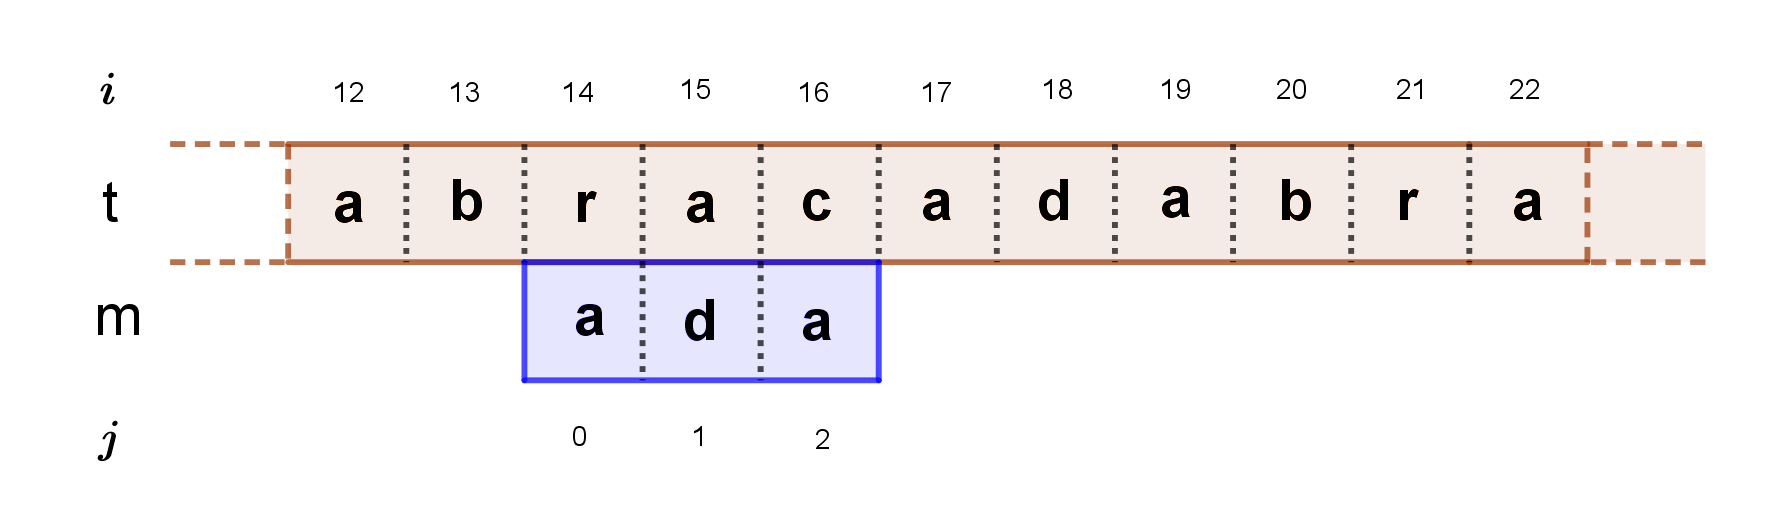

<p>on compare le <code>'a'</code> du motif avec le <code>'r'</code> du texte, obtenant immédiatement une différence : on peut avancer la fenêtre en incrémentant $i$, qui passe de 14 à 15.</p>
Dans la nouvelle fenêtre, le premier caractère coïncide bien :

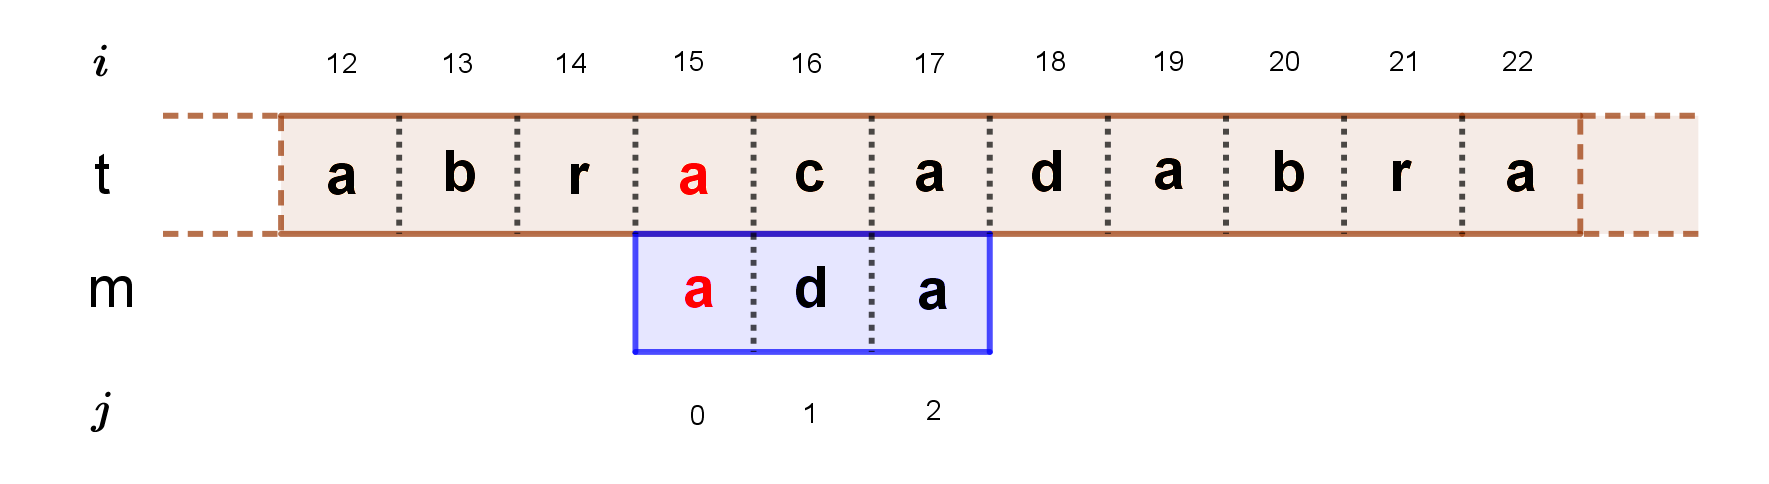

et on incrémente $j$ pour tester les caractères suivants, <code>'d'</code> et <code>'c'</code> :

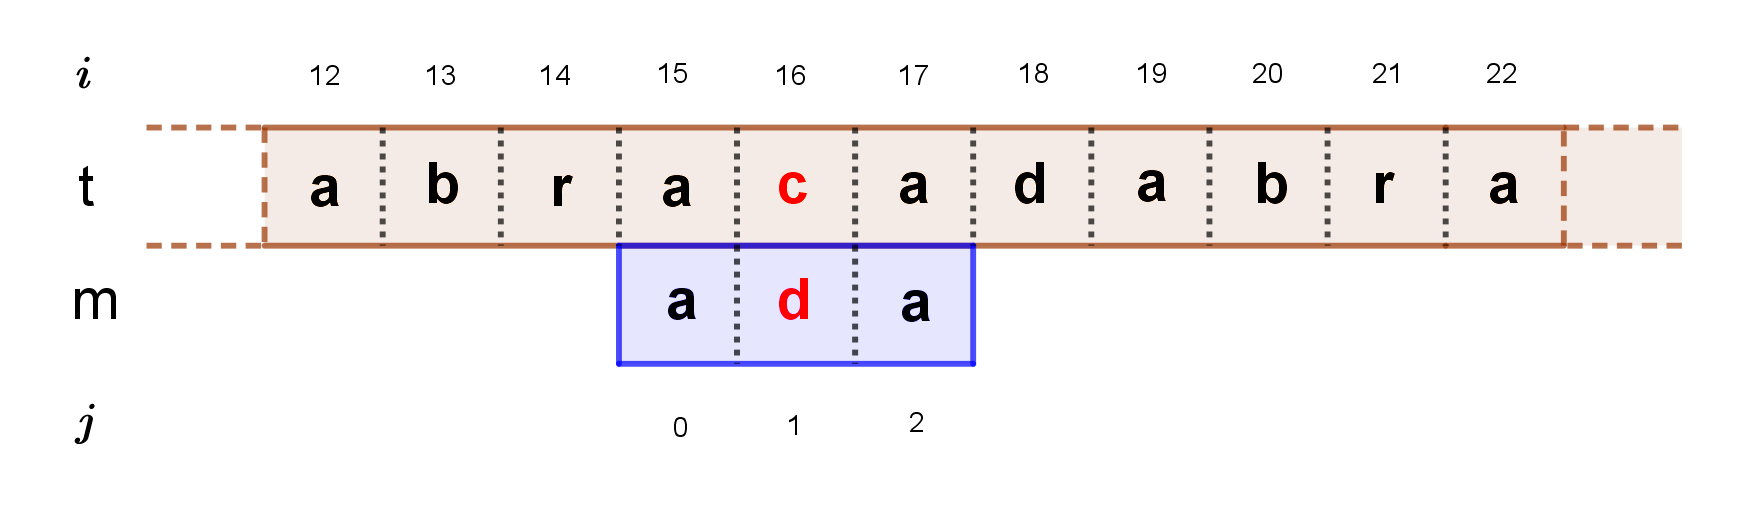

On est à nouveau en situation d’échec. Il faut donc décaler notre motif, et on effectue donc $i = i + 1$ et $j = 0$.

<strong>Exercice 3</strong>
<p>Implémentez deux fonctions pour effectuer cette recherche de motif dans un texte.</p>
<ul>
<li><code>occurence</code> qui prend en paramètres le motif m, le texte t et un indice i puis renvoie True s'il y a une occurence de la chaîne m dans la chaîne t à la position i ;
<li><code>recherche_Naif</code> qui prend en paramètres le motif m et le texte t puis affiche toutes les occurences de m dans t.
</ul>

In [1]:
texte="abdabrababdraabradbabracadabraabaadaabracadabrarabadaraabracadabraadraba"
motif="abracadabra"

def occurence(m,t,i):
    '''indique s'il y a une occurence de la chaîne m dans la chaîne t à la position i'''
    if i<0 or i>len(t)-len(m):
        return False
    for j in range(len(m)):
        if t[i+j]!=m[j]:
            return False
    return True

def recherche_Naif(m,t):
    '''affiche toutes les occurences de m dans t'''
    for i in range(0,len(t)-len(m)+1):
        if occurence(m,t,i):
            print("occurence à la position",i)

recherche(motif,texte)

occurence à la position 19
occurence à la position 36
occurence à la position 55


Combien de comparaisons ont-elles été faites pour trouver ce résultat ?

L'objectif premier d'un calcul de complexité algorithmique est de pouvoir comparer l’efficacité d’algorithmes résolvant le même problème. Dans une situation donnée, cela permet donc d'établir lequel des algorithmes disponibles est le plus optimal.

Ce type de question est primordial, car pour des données volumineuses la différence entre les durées d'exécution de deux algorithmes ayant la même finalité peut être de l'ordre de plusieurs jours.

Avant de se pencher de manière théorique sur la complexité temporelle, nous allons comparer brièvement la complexité des algorithmes de recherche vus depuis le début de ce cours.
(Re-)Parlons maintenant du module time de Python, testez le programme suivant :

In [2]:
import time
debut = time.time()

In [3]:
# On attend quelques secondes avant de taper la commande suivante
fin = time.time()
print(debut < fin)
fin - debut # Combien de secondes entre debut et fin ?

True


0.7298088073730469

Comparer temporellement maintenant la méthode <code>find</code> de Python et notre algorithme de recherche Naïf sur l'exemple de départ :"Julien trembla" dans le roman "Le rouge et le noir".

L'un semble beaucoup plus rapide que l'autre, il semble donc important d'accélérer notre algorithme de recherche !

## IV. Accélération de recherche

### a) Hypothèse

<p>Posons l'hypothèse que chaque lettre du motif n'apparait qu'une seule et unique fois dans ce motif. <br>
Dans une boucle de vérification sur le motif, lorsque le test est négatif (T[$i$+$j$] != M[$j$]): <br>
- La partie du  motif qui précède ne peut contenir cette lettre qu'une seule fois dans une combinaison unique <br>
- Puisque le motif qui précède concorde avec des lettres combinées de manière unique, un nouveau motif recommencera au mieux à l'emplacement du test. <br>
Dans tous les cas le saut suivant serait au minimum de 1, donc rejoindrait la configuration de la recherche naïve.
On peut donc décider de faire un saut égal à l'index du motif de l'échec $j$ avec un saut de 1 au minimum.</p>

<strong>Illustration</strong> :

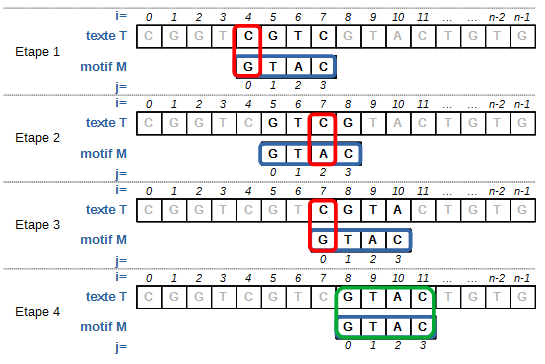

<p>- Etape 1 : Position du motif $i = 4$. Le saut pour passer à l'étape 2 est de 1, saut minimal, puisque la non-concordance est sur la première lettre du motif.<br>
- Etape 2 : Position du masque $i = 5$. Le saut pour passer à l'étape 3 est de 2, puisque la non-concordance est sur la 3eme lettre du motif, d'indice $j$.<br>
- Etape 3 : Position du motif $i = 7$. Le saut pour passer à l'étape 4 est de 1, saut minimal, puisque la non-concordance est sur la première lettre du motif.<br>
- Etape 4 : La position du motif est 8 (7+1) et toutes les lettres du motif concordent avec les lettres du texte</p>

### b) Algorithme

<p>Nous partons ici du principe suivant : aucune lettre ne figure plus d'une fois dans le motif recherché</p>
<p>initialisation du <em>Texte</em> <code>t</code> et du <em>Motif</em> <code>m</code><br>
    si longueur(<code>t</code>)est inférieure à longueur(<code>m</code>)<br>
&nbsp;&nbsp;&nbsp;&nbsp;alors on retourne un code d'erreur (-1, par convention)<br>
sinon<br>
&nbsp;&nbsp;&nbsp;&nbsp;on initialise un compteur à 0<br>
&nbsp;&nbsp;&nbsp;&nbsp;pour $i$ inférieur à longueur(<code>t</code>) - longueur(<code>m</code>)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;pour $j$ inférieur à longueur(<code>m</code>)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;si t[$i+j$] et m[$j$] sont différents -->on sort de la boucle et on passe à la lettre suivante dans <code>t</code><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;si m[$j$] est la dernière lettre du motif --> on ajoute 1 au compteur<br>
&nbsp;&nbsp;&nbsp;&nbsp;on retourne la valeur du compteur</p>
<p>Attention : les indices dans python commencent à 0 et la dernière valeur d'une chaine de longueur n est donc n-1</p>

### c) A vous de coder

<strong>Application à notre exemple filé</strong> :

Faire la recherche <code>'Domingue'</code> dans le texte du roman et comparer les temps de recherche entre <code>Recherche_Naif</code> et notre dernière fonction.

## III) Boyer-Moore version simplifiée de Horspool

### Deux idées pour accélérer la recherche

<ul>
    <li>La première idée consiste à comparer le motif avec la portion du texte qui apparaît dans la fenêtre de droite à gauche, et non pas de gauche à droite. Ainsi, on fait décroître j à partir de p − 1 jusqu’à trouver que le caractère qui lui fait face dans le texte, c’est-à-dire x = texte[i + j], est différent du caractère y = motif[j] du motif.
<li>La deuxième idée consiste à opérer un décalage de la fenêtre qui varie en fonction de la paire de caractères qui ont révélé la non-correspondance, c’est-à-dire en fonction de (x; y).
   </ul>

### Déroulement de l'algorithme

### Un exemple à faire à la main
où on remarque que le tableau de décalage est toujours le même

### Prétraitement

### Implémentation en Python

Un vidéo récapitulative : https://www.youtube.com/watch?v=cjPv3fyarxU

### En route vers le grand oral

### Pour aller plus loin : méthode du bon suffixe